# Malignant Comment Classifier Project

## Data Set Description

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment. 

The data set includes:

-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 


In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_curve,roc_auc_score,auc
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
test =pd.read_csv(r'C:\Users\vinit\Downloads\Malignant Comments Classifier\test.csv')
train =pd.read_csv(r'C:\Users\vinit\Downloads\Malignant Comments Classifier\train.csv')

In [3]:
print(train.shape)
print(test.shape)

(159571, 8)
(153164, 2)


In [4]:
train.head(5)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
test.head(5)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id                  159571 non-null object
comment_text        159571 non-null object
malignant           159571 non-null int64
highly_malignant    159571 non-null int64
rude                159571 non-null int64
threat              159571 non-null int64
abuse               159571 non-null int64
loathe              159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
id              153164 non-null object
comment_text    153164 non-null object
dtypes: object(2)
memory usage: 2.3+ MB


In [8]:
print(train.isnull().values.any())
print(train.isnull().sum())

False
id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64


In [9]:
print(test.isnull().values.any())
print(test.isnull().sum())

False
id              0
comment_text    0
dtype: int64


In [10]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,eff0423f09b5fc78,:Please see the previous section. The consensu...
freq,1,1


In [12]:
corr_mat=train.corr()
corr_mat

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


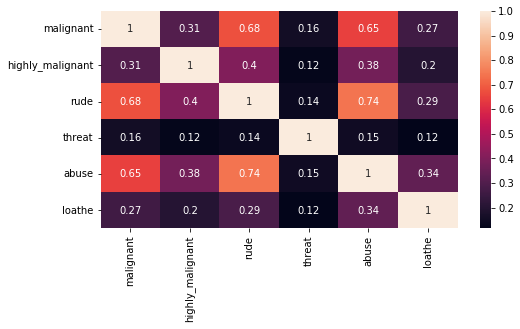

In [13]:
plt.figure(figsize=[8,4])
sns.heatmap(corr_mat,annot=True)
plt.title = ('Correlation Matrix')
plt.show()

In [14]:
train['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

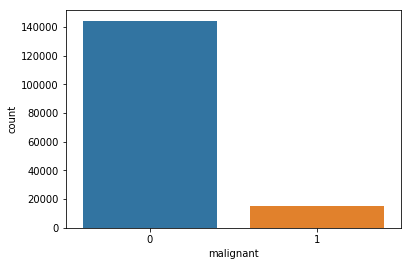

In [15]:
sns.countplot(train['malignant'])

In [16]:

train['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

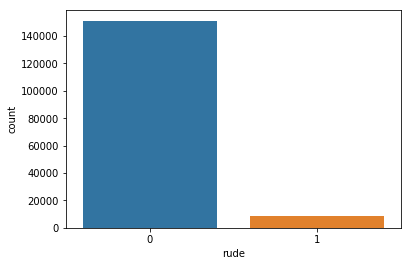

In [17]:
sns.countplot(train['rude'])

In [18]:
train['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

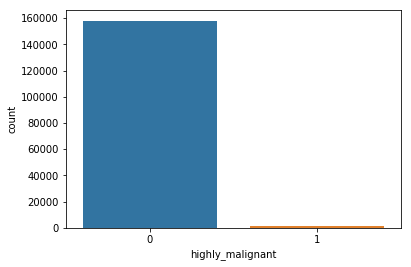

In [19]:

sns.countplot(train['highly_malignant'])

In [20]:
train['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

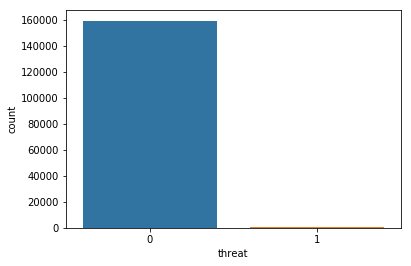

In [21]:
sns.countplot(train['threat'])

In [22]:
train['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

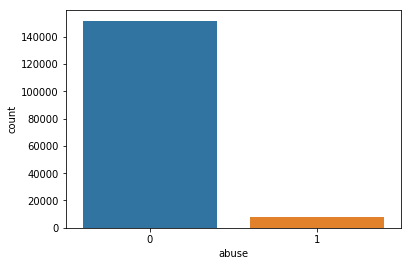

In [23]:
sns.countplot(train['abuse'])

In [ ]:
train['loathe'].value_counts()

In [ ]:
sns.countplot(train['loathe'])

In [26]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import  stopwords
import string
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP-15\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP-15\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
train['comment_text'] = train['comment_text'].str.lower()
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

Convert all messages to lower case.

Replace email addresses with 'email'.

Replace URLs with 'webaddress'.

Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'.

Replace numbers with 'numbr'.

In [28]:
lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

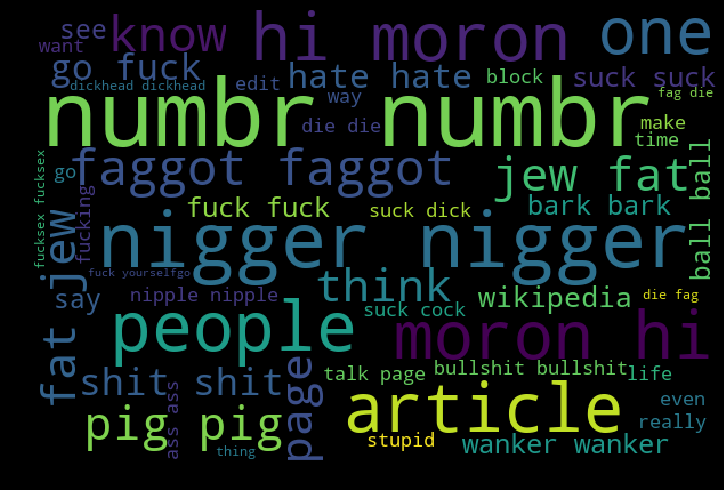

In [29]:
!pip install wordcloud
from wordcloud import WordCloud
hams = train['comment_text'][train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

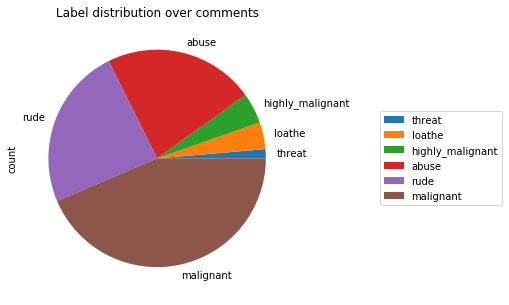

In [30]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [31]:
target_data = train[cols_target]

train['bad'] =train[cols_target].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])

In [33]:
x = features
y=train['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=15,test_size=.25)

In [34]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
logmodel_predict = logmodel.predict(x_train)
logmodel_predict_test = logmodel.predict(x_test)
print('train_accuracy: ',accuracy_score(y_train,logmodel_predict))
print('test_accuracy: ',accuracy_score(y_test,logmodel_predict_test))
print(confusion_matrix(y_test,logmodel_predict_test))
print(classification_report(y_test,logmodel_predict_test))

train_accuracy:  0.9596333494877922
test_accuracy:  0.9560825207429875
[[35677   187]
 [ 1565  2464]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     35864
           1       0.93      0.61      0.74      4029

   micro avg       0.96      0.96      0.96     39893
   macro avg       0.94      0.80      0.86     39893
weighted avg       0.96      0.96      0.95     39893



Logistic: ROC AUC=0.803


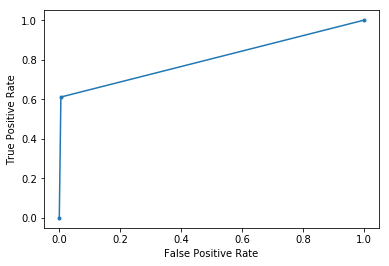

In [35]:
logmodel_auc = roc_auc_score(y_test, logmodel_predict_test)
print('Logistic: ROC AUC=%.3f' % (logmodel_auc))
logmodel_fpr, logmodel_tpr, _= roc_curve(y_test, logmodel_predict_test)
plt.plot(logmodel_fpr, logmodel_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10)
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_train)
rf_predict_test = rf.predict(x_test)
print('train_accuracy: ',accuracy_score(y_train,rf_predict))
print('test_accuracy: ',accuracy_score(y_test,rf_predict_test))
print(confusion_matrix(y_test,rf_predict_test))
print(classification_report(y_test,rf_predict_test))

train_accuracy:  0.9052290312338107
test_accuracy:  0.9058982778933647
[[35864     0]
 [ 3754   275]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     35864
           1       1.00      0.07      0.13      4029

   micro avg       0.91      0.91      0.91     39893
   macro avg       0.95      0.53      0.54     39893
weighted avg       0.91      0.91      0.87     39893



Random Forest: ROC AUC=0.534


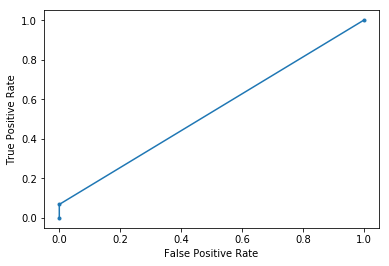

In [37]:
rf_auc = roc_auc_score(y_test, rf_predict_test)
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predict_test)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_train)
dt_predict_test = dt.predict(x_test)
print('train_accuracy: ',accuracy_score(y_train,dt_predict))
print('test_accuracy: ',accuracy_score(y_test,dt_predict_test))
print(confusion_matrix(y_test,dt_predict_test))
print(classification_report(y_test,dt_predict_test))

train_accuracy:  0.9402479987967713
test_accuracy:  0.9379841074875291
[[35701   163]
 [ 2311  1718]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     35864
           1       0.91      0.43      0.58      4029

   micro avg       0.94      0.94      0.94     39893
   macro avg       0.93      0.71      0.77     39893
weighted avg       0.94      0.94      0.93     39893



Decision Tree: ROC AUC=0.711


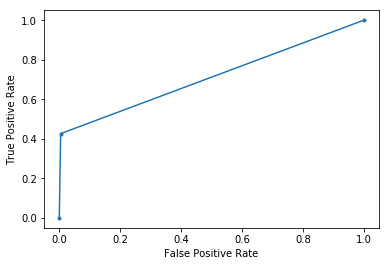

In [39]:
dt_auc = roc_auc_score(y_test, dt_predict_test)
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_predict_test)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
knn_predict = knn.predict(x_train)
knn_predict_test = knn.predict(x_test)
print('train_accuracy: ',accuracy_score(y_train,knn_predict))
print('test_accuracy: ',accuracy_score(y_test,knn_predict_test))
print(confusion_matrix(y_test,knn_predict_test))
print(classification_report(y_test,knn_predict_test))

train_accuracy:  0.9200103611357142
test_accuracy:  0.9186072744591783
[[35771    93]
 [ 3154   875]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     35864
           1       0.90      0.22      0.35      4029

   micro avg       0.92      0.92      0.92     39893
   macro avg       0.91      0.61      0.65     39893
weighted avg       0.92      0.92      0.90     39893



Decision Tree: ROC AUC=0.607


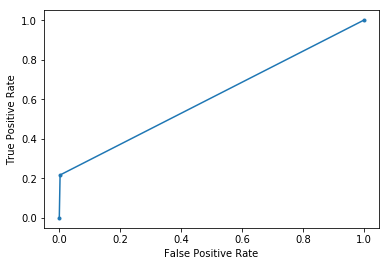

In [41]:
knn_auc = roc_auc_score(y_test, knn_predict_test)
print('Decision Tree: ROC AUC=%.3f' % (knn_auc))
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_predict_test)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNeighbor Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [42]:
scr=cross_val_score(logmodel, x, y, cv=6)
print('Cross validation score of Logistic Regression : ',scr.mean())

scr=cross_val_score(dt, x, y, cv=6)
print('Cross validation score of Decision Tree : ',scr.mean())

scr=cross_val_score(rf, x, y, cv=6)
print('Cross validation score of Random Forest Classifier : ',scr.mean())

scr=cross_val_score(knn, x, y, cv=6)
print('Cross validation score of KNeighbors Classifier : ',scr.mean())

Cross validation score of Logistic Regression :  0.9563329062380036
Cross validation score of Decision Tree :  0.9373570368979204
Cross validation score of Random Forest Classifier :  0.9011474631311233
Cross validation score of KNeighbors Classifier :  0.9183435528384097


From above cross validation, we can observe that Logistic Regression is having least difference between accuracy score and cross validation.

So, Logistic Regression Model with accuracy score of 95.96% is the best model.

In [47]:
import pickle
pickle.dump(logmodel,open('Malignant_Comment_Classifier','wb'))